# Data Analysis for SussexBudgetProductions' next film.

The purpose of this report is to analyze IMBD data in order to find trends and non-obvious patterns to make efficient decisions for SussexBudgetProductions' next film, which is expected to have a budget of 1.5M next year.
The report is structured in data wrangling and cleaning, general exploratory analysis, exploratory analysis of movies with a budget of 1.5M or less, hypothesis and test and, finally, a summary with the findings of the analysis and the proposed recommendations for an efficient action plan.

In [149]:
#Libraries used in the report.

import numpy as np  
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats #For the correlation matrix and calculation of the p-value

In [150]:
#Data collection

myfile='movie_metadata.csv'
myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


# 1) Data wrangling and cleaning


First, we divide gross and budget by 1.000.000 in order not to work with such large numbers.

In [151]:
df['gross']=df['gross']/1000000
df['budget']=df['budget']/1000000

We generate a new column called profit, which is the subtraction between budget and gross. This will be our main indicator, since it will tell us if each film makes or loses money with respect to the budget.

In [152]:
df['profit']=df['gross']-df['budget']

Next, we will perform a data cleanup, so we will do a pre- and post-cleanup count to verify the amount of data that was lost.

In the data cleaning we filter all the values of the gross and budget column that are empty or zero, since, in these cases the data is not available and considering them as zero values would be wrong for our analysis.

In [153]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
profit                       3891
dtype: int64

In [154]:
df=df[(df.gross != None) & (df.budget != None) & (df.gross > 0) & (df.budget>0)]

In [155]:
df.count()

color                        3889
director_name                3891
num_critic_for_reviews       3890
duration                     3890
director_facebook_likes      3891
actor_3_facebook_likes       3881
actor_2_name                 3886
actor_1_facebook_likes       3888
gross                        3891
genres                       3891
actor_1_name                 3888
movie_title                  3891
num_voted_users              3891
cast_total_facebook_likes    3891
actor_3_name                 3881
facenumber_in_poster         3885
plot_keywords                3860
movie_imdb_link              3891
num_user_for_reviews         3891
language                     3888
country                      3891
content_rating               3840
budget                       3891
title_year                   3891
actor_2_facebook_likes       3886
imdb_score                   3891
aspect_ratio                 3816
movie_facebook_likes         3891
profit                       3891
dtype: int64

We observed that our data decreased by approximately 20% after cleaning.

Here we create two new columns called main_genre and secondary_genre  from the 'genres' column. This column will be used later for the analysis of movie genres.

In [156]:
#pd.set_option('mode.chained_assignment', None)

df["main_genre"]="x"  #We assign a value x to all the rows just to create the whole column
df["secondary_genre"]="x"

#As the genre comes in the format "main_genre|secondary_genre" 
#we use the split function to divide the string by the symbol "|". 

for i in range(len(df)):
    try:
        df["main_genre"].iloc[i]=df["genres"].values[i].split("|")[0]
        df["secondary_genre"].iloc[i]=df["genres"].values[i].split("|")[1]
    except:
        df["main_genre"].iloc[i]=df["genres"].values[i].split("|")[0]
        df["secondary_genre"].iloc[i]=df["genres"].values[i].split("|")[0]

We visualize a small sample of the data. 

In [157]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,main_genre,secondary_genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237.0,2009.0,936.0,7.9,1.78,33000,523.505847,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.404152,Action|Adventure|Fantasy,...,PG-13,300.0,2007.0,5000.0,7.1,2.35,0,9.404152,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.074175,Action|Adventure|Thriller,...,PG-13,245.0,2015.0,393.0,6.8,2.35,85000,-44.925825,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.130642,Action|Thriller,...,PG-13,250.0,2012.0,23000.0,8.5,2.35,164000,198.130642,Action,Thriller
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.058679,Action|Adventure|Sci-Fi,...,PG-13,263.7,2012.0,632.0,6.6,2.35,24000,-190.641321,Action,Adventure


# 2) Exploratory Analysis: General overview

### Profit, budget and gross through time

We created a line graph to observe the trend of overall profit, budget and gross over the years. These values are an average of the total number of films per year.

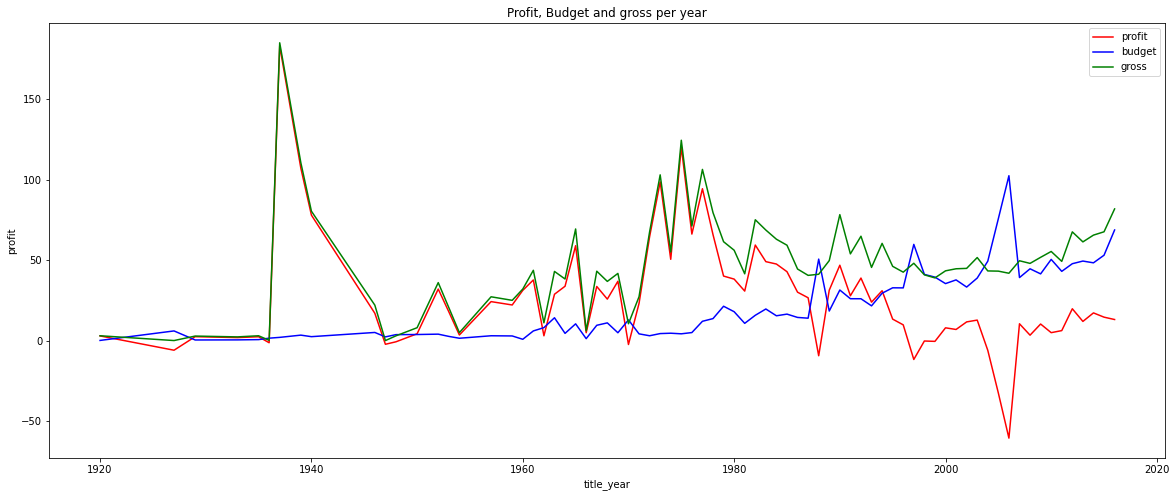

In [158]:
fig,axs = plt.subplots(ncols=1, figsize=(20,8))
sns.lineplot( x = "title_year", y = "profit", data = df,ci=None,label='profit',color='red')
sns.lineplot( x = "title_year", y = "budget", data = df,ci=None,label='budget',color='blue')
sns.lineplot( x = "title_year", y = "gross", data = df,ci=None,label='gross',color='green')
plt.title("Profit, Budget and gross per year")
#fig.tight_layout()
plt.show()

We can observe that from 1936 until 1990 with little budget the films had a high profit, a situation that changes from the year 2000 onwards. This can be related to the expectations of the audience over time. A person from the year 2000 is not surprised by the same effects, the same stories as a person from the 2000s onwards. The special effects and the quality of the films have made the audience more demanding.

This could lead us to separate the data, however, we must first analyse the subset of films that are within the company's budget range (1.5M or less), as there may be similar behaviour for those types of films over the years. We will do this later in section 3.

### Profit analysis in main and secondary movie genre.

<AxesSubplot:xlabel='main_genre', ylabel='profit'>

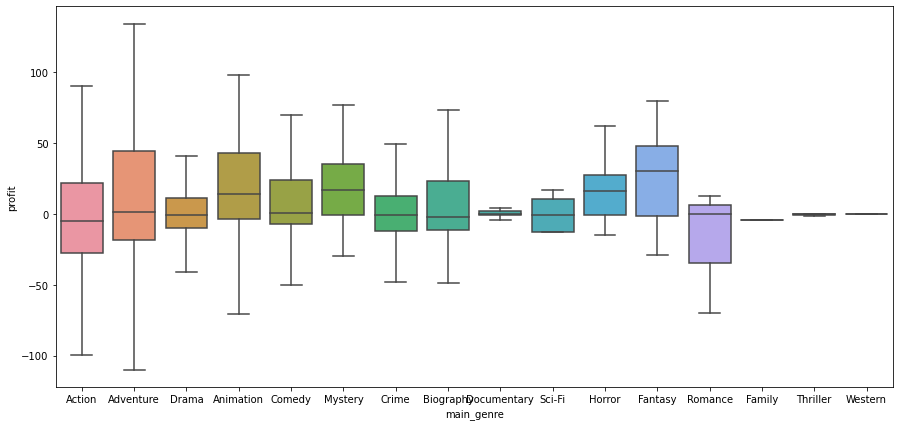

In [159]:
fig,axs = plt.subplots(figsize=(15,7))
sns.boxplot(x="main_genre", y="profit", data=df[ (df.title_year >=2000)],showfliers=False)
#sns.boxplot(x="secondary_genre", y="profit", data=df[ (df.title_year >=2000)],showfliers=False,ax=axs[1])

### Correlation Matrix

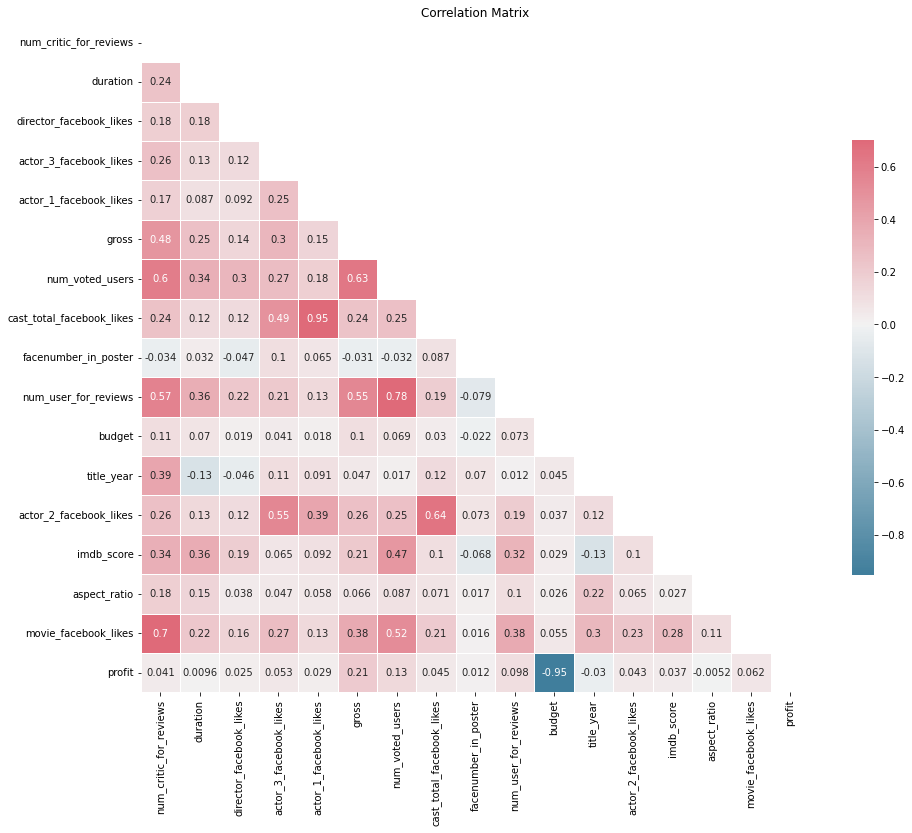

In [160]:
corr=df[(df.title_year >=1900) ].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 8, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True)
plt.title("Correlation Matrix")
plt.show()

From this correlation matrix, we can notice the following:

There is a very high negative correlation of 0.95 between profit and budget. This means that as the budget increases, the profit decreases.

Profits have no strong correlation with other variables such as IMBD score, duration or score.

In the following, we will plot profit vs budget to understand the behaviour that leads to a high negative correlation of 0.95.

### Profit Vs Budget

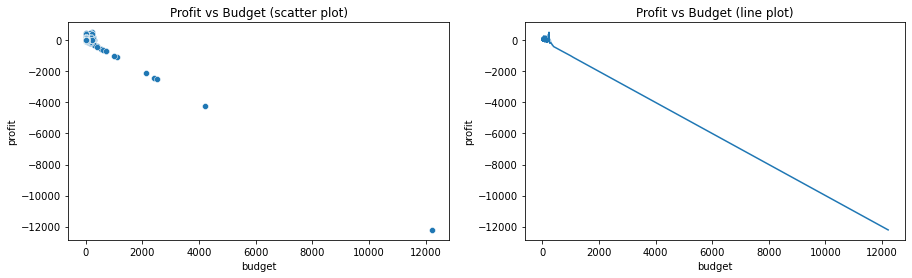

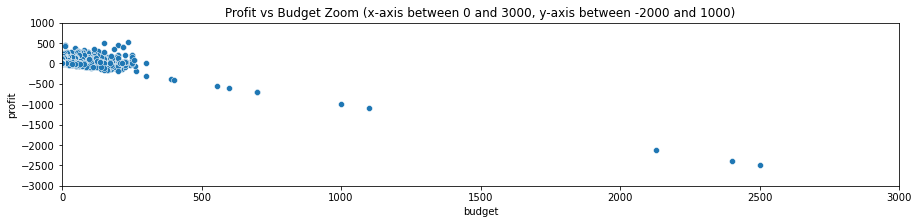

In [161]:
fig,axs = plt.subplots(ncols=2,figsize=(15,4))
sns.scatterplot(data=df, x="budget", y="profit",ax=axs[0]) 
sns.lineplot(data=df, x="budget", y="profit",ax=axs[1]) 
#axs[1].set_ylim( -1.2, 0)
axs[0].set_title("Profit vs Budget (scatter plot)")
axs[1].set_title("Profit vs Budget (line plot)")

fig,axs = plt.subplots(figsize=(15,3))
sns.scatterplot(data=df, x="budget", y="profit") 
axs.set_xlim( 0, 3000)
axs.set_ylim( -3000, 1000)
axs.set_title("Profit vs Budget Zoom (x-axis between 0 and 3000, y-axis between -2000 and 1000)")
plt.show()

We can clearly see that, under the negative profit of 200M the graph transforms into a negative linear function and, therefore, the correlation between budget and profit is -0.95. However, this is true for only 14 movies, We can even see an isolated point with negative profit of 12000 and budget close to 12000.

The 14 films that form this straight line are as follows:


In [162]:
low_profit=df[(df.profit<-200)]['movie_title'].count()
print(low_profit)

14


In [163]:
df[(df.profit<-200)][['movie_title','profit']].sort_values(by='profit',ascending=False)

,movie_title,profit
2740,Ong-bak 2,-299.897945
1016,The Messenger: The Story of Joan of Arc,-375.868702
3311,The Legend of Suriyothai,-399.545745
1338,Red Cliff,-553.005191
3273,Kites,-598.397534
3075,Kabhi Alvida Naa Kehna,-696.724557
3851,Tango,-698.312689
4542,Godzilla 2000,-989.962610
3423,Akira,-1099.560838
2334,Steamboy,-2127.109510


To better understand the behaviour between budget and profit, we will plot the pearson correlation between these two variables as the budget increases. That is, we will start with a low budget and we will plot the correlation with the profit, then a higher budget and  we will plot the correlation again, then another budget higher than the previous one, until we reach the maximum budget.

In [164]:
#we order the values from lowest to highest budget
sorted_budget=df.sort_values(by=['budget'])['budget'].to_numpy()

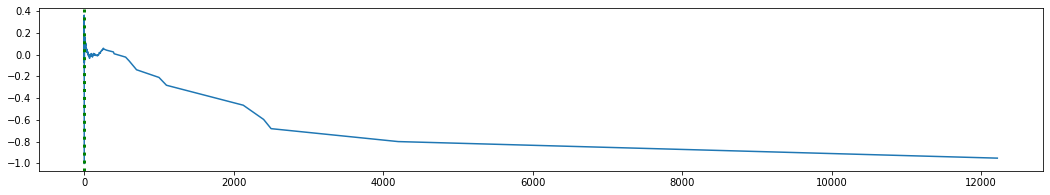

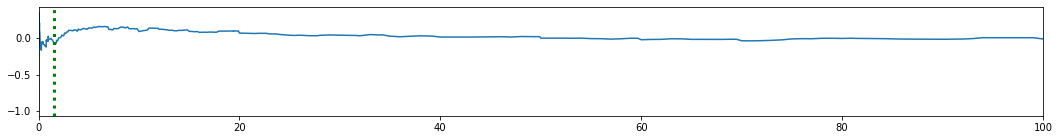

In [165]:
pearsons=[]
for i in sorted_budget:
    pearsoncc=df[(df.budget<=i)][["profit","budget"]].corr()
    pearsoncc.values
    pearsons.append(pearsoncc.values[0,1])
    
plt.subplots(figsize=(18,3))
plt.plot(sorted_budget,pearsons)
plt.axvline(x=1.5, ymin=0, ymax=1, color='g', linestyle=':', linewidth=3)
plt.show()
plt.subplots(figsize=(18,2))
plt.plot(sorted_budget,pearsons)
plt.axvline(x=1.5, ymin=0, ymax=1, color='g', linestyle=':', linewidth=3)
plt.xlim(0,100)
plt.show()

Looking at the first graph, we can see that the correlation between budget and profit decreases and becomes negative as the budget increases. For instance, from 4000 M and upwards we see a negative correlation of 0.8.
The conclusion we can draw from this is that it is risky to go for very high budgets because the data shows that the higher the budget, the higher the correlation with profit tends to be negative, so profit tends to be negative as well.

However, the 1.5M proposal is within a safe zone as shown in the second graph (green vertical line) as the correlation in this case is still positive and has not started to decrease.

In the following, we will perform the exploratory analysis considering the subset of films in the budget range of 1.5M or less.


# 3) Exploratory Analysis: Films in the budget range of 1.5M or less 

The following is an exploratory analysis for the subset of films with a budget in the proposed range of 1.5M or less.

In [166]:
df_filtered=df[(df.budget<=1.5)] #filter the dataframe by budget<=1.5

### Profit, budget and gross through time

We created a line chart to observe the trend of overall profit, budget and gross over the years for the subset of films with budget less than or equal to 1.5M. These values are an average considering the total number of films per year.

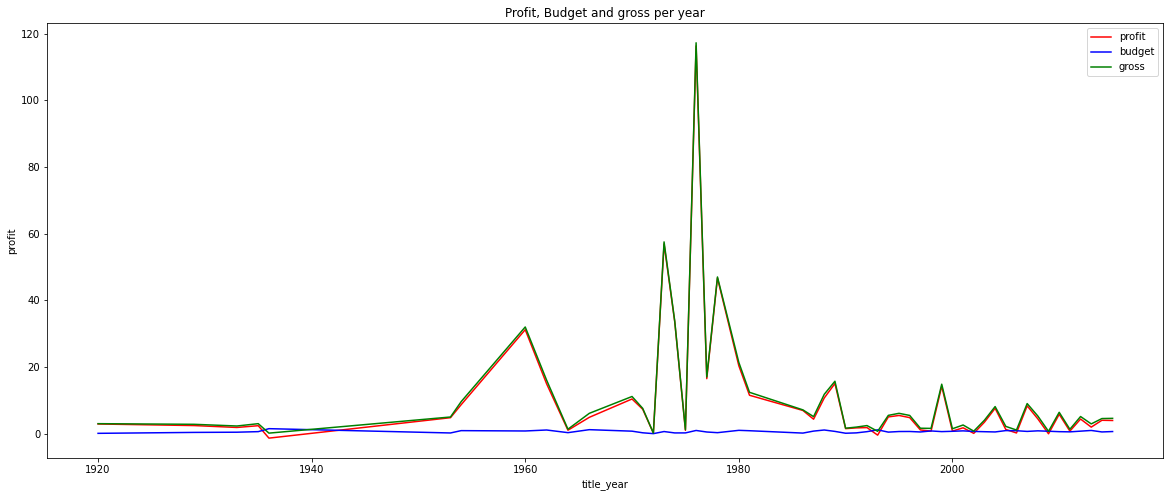

In [167]:
fig,axs = plt.subplots(ncols=1, figsize=(20,8))
sns.lineplot( x = "title_year", y = "profit", data = df_filtered,ci=None,label='profit',color='red')
sns.lineplot( x = "title_year", y = "budget", data = df_filtered,ci=None,label='budget',color='blue')
sns.lineplot( x = "title_year", y = "gross", data = df_filtered,ci=None,label='gross',color='green')
plt.title("Profit, Budget and gross per year")
plt.show()

The trend shows that for a budget of 1.5M or less, profit and gross remain at similar values, unlike the previous analysis in which profit and gross were separated from 1980 onwards. This indicates that in this budget range, there are not too large profit losses.
Also, it can be observed that between 1970 and 1990 there is a considerable increase in profit and gross.

### Budget, gross and profit analysis using boxplots and histograms.

Box plots and histograms of budget, gross and profit are plotted to determine how the data is distributed, to see if there are outliers and to generate a cleanup of the outliers.

In the case of box plots, a boxplot with outliers (left) and one without outliers (right) are plotted. 

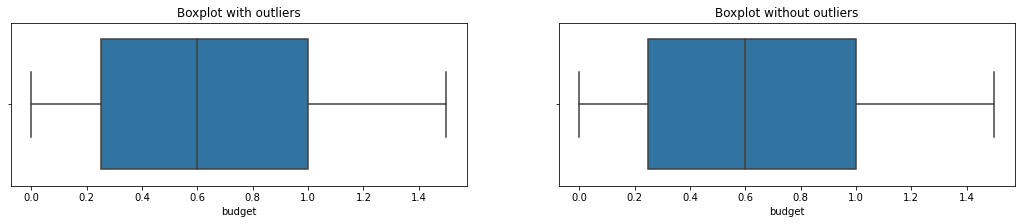

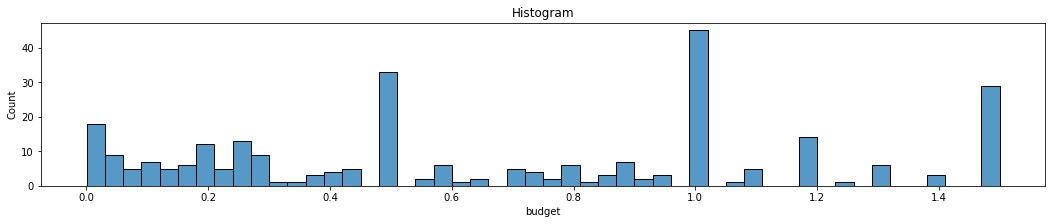

In [168]:
fig,axs = plt.subplots(ncols=2,nrows=1, figsize=(18,3))
sns.boxplot( x=df_filtered["budget"],ax=axs[0])
sns.boxplot( x=df_filtered["budget"], showfliers=False,ax=axs[1] )
axs[0].set_title('Boxplot with outliers')
axs[1].set_title('Boxplot without outliers')
fig,axs = plt.subplots( figsize=(18,3))
sns.histplot(data=df_filtered, x="budget",bins=50)
axs.set_title('Histogram')

plt.show()

In the case of the budget, there are no outliers, so the first graph (with outliers) is equal to the second graph (without ouliers). We observe that the mean is 0.6M and 50% of the total data is distributed between 0.25M and 1M (first quartile and third quartile, respectively).

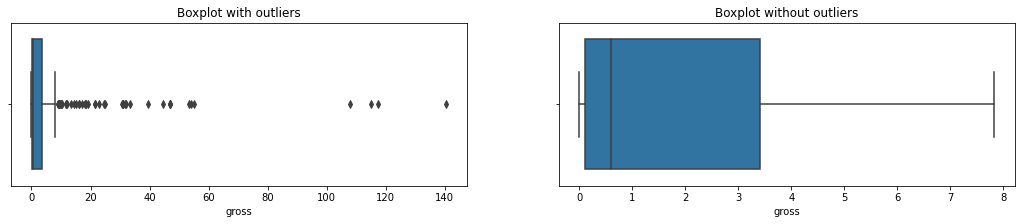

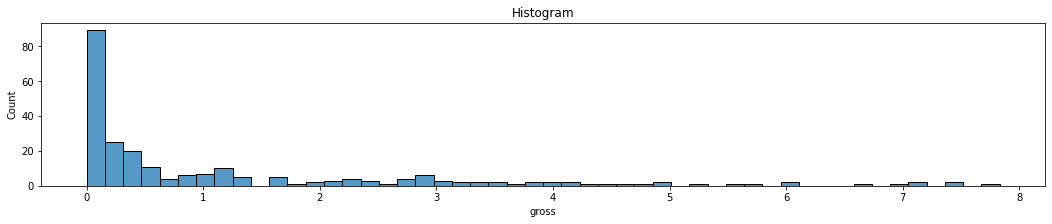

In [169]:
fig,axs = plt.subplots(ncols=2,nrows=1, figsize=(18,3))
sns.boxplot( x=df_filtered["gross"],ax=axs[0])
sns.boxplot( x=df_filtered["gross"], showfliers=False,ax=axs[1] )
axs[0].set_title('Boxplot with outliers')
axs[1].set_title('Boxplot without outliers')
fig,axs = plt.subplots( figsize=(18,3))
sns.histplot(data=df_filtered[(df_filtered.gross <8) & (df_filtered.gross>0) &(df_filtered.budget <=1.5)], x="gross",bins=50)
axs.set_title('Histogram')
plt.show()

In the gross case, there are outliers above 10M that are removed in the boxplot on the right and the histogram below. 
We observe that the mean without outliers is 0.6M and 25% of the total data is distributed between 0.1M and 0.6M (first quartile and median, respectively). The other 25% is more dispersed between 0.6 and 3.4M (median and third quartile,respectively)

This is a right-skewed boxplot, as the data is mostly concentrated on the left between 0 and 1M. This is best seen in the histogram.

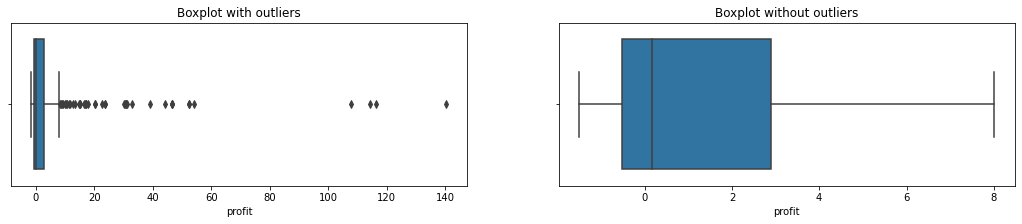

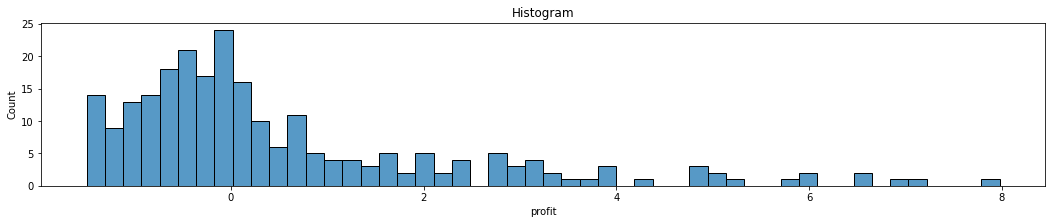

In [170]:
fig,axs = plt.subplots(ncols=2,nrows=1, figsize=(18,3))
sns.boxplot( x=df_filtered["profit"],ax=axs[0])
sns.boxplot( x=df_filtered["profit"], showfliers=False,ax=axs[1] )
axs[0].set_title('Boxplot with outliers')
axs[1].set_title('Boxplot without outliers')
fig,axs = plt.subplots( figsize=(18,3))
sns.histplot(data=df_filtered[(df_filtered.profit <= 8) ], x="profit",bins=50)
axs.set_title('Histogram')
plt.show()

In the profit case, there are outliers above 10M that are removed in the boxplot on the right and the histogram below. 
We observe that the mean without outliers is 0.2M and 50% of the total data is distributed between -1.2M (negative profit) and 0.1M (minimum value and median, respectively). The other 25% is more dispersed between 0.1 and 2.5M (median and third quartile,respectively) and the las 25% is distributed between 2.5M and 8 (third quartile and maximum value, respectively).

This is a right-skewed boxplot, as the data is mostly concentrated on the left between -1.2 and 1M which is best seen in the histogram. This means that 50% of the total data has a low profit and approximately 40% is negative. The remaining 50% has a profit above 0.1M and below 8M.

### Correlation Matrix

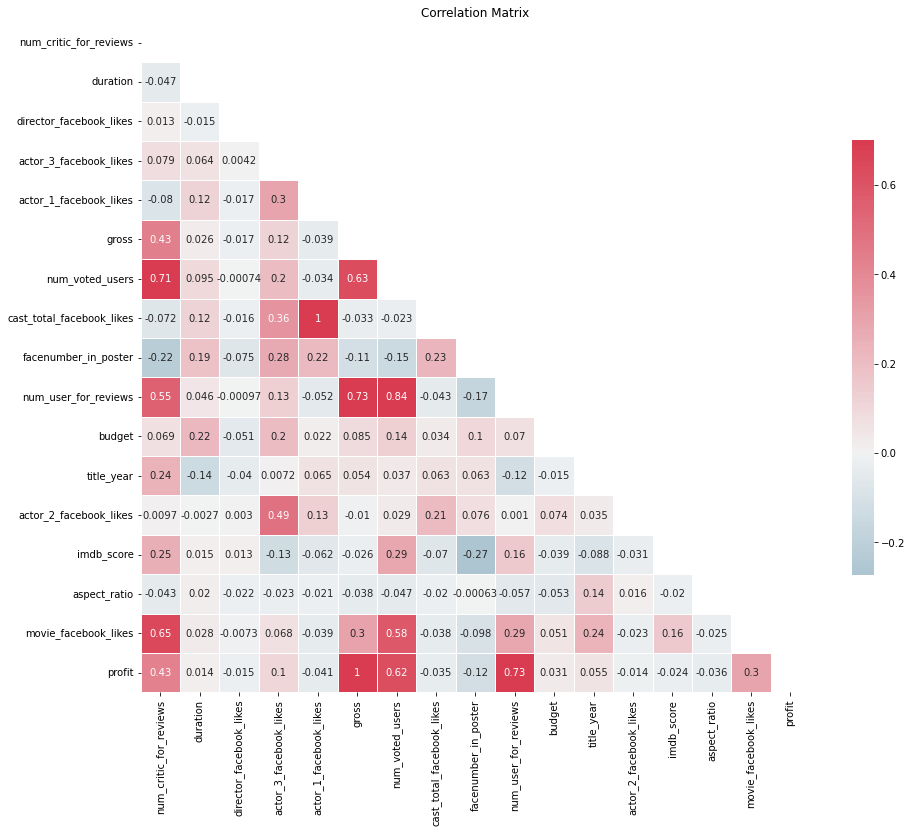

In [171]:
corr=df[(df.title_year >=2000) & (df.profit < 80) & (df.profit>-60) & (df.budget <=1.5) & (df.budget>0) & (df.gross <145) & (df.gross>0)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 8, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True)
plt.title("Correlation Matrix")
plt.show()

From this correlation matrix, we can observe the following:

In this subset of data (less than or equal to 1.5M budget) there is no longer a high negative correlation between profit and budget. 

Profit has a correlation of 1 with gross, a correlation of 0.62 with num_voted_users and 0.73 with num_users_for_review.

### Scatter plots categorized by movie genre.

Dispersion plots will help us to try to find patterns that are not obvious and to see in more detail the behavior of the variables that show a correlation in the correlation matrix above. We categorize with a different color each movie genre and the size of the circle is defined by the profit value (the higher the profit the larger the size of the circle).

Although there is no correlation between profit and budget, we can plot profit vs. budget and categorize with a color by movie genre, to try to see a pattern in the data.

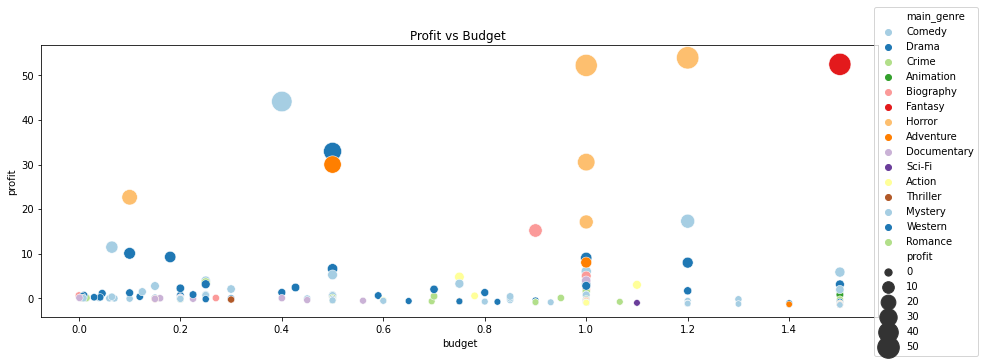

In [172]:
fig,axs = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df[(df.title_year >=2000) & (df.profit < 80) & (df.profit>-60) & (df.budget <=1.5) & (df.budget>0) & (df.gross <145) & (df.gross>0)], x="budget", y="profit",hue="main_genre",palette="Paired",size="profit",sizes=(40, 500)) 
axs.set_title("Profit vs Budget ")
plt.legend(loc='right', borderaxespad=-10)
plt.show()

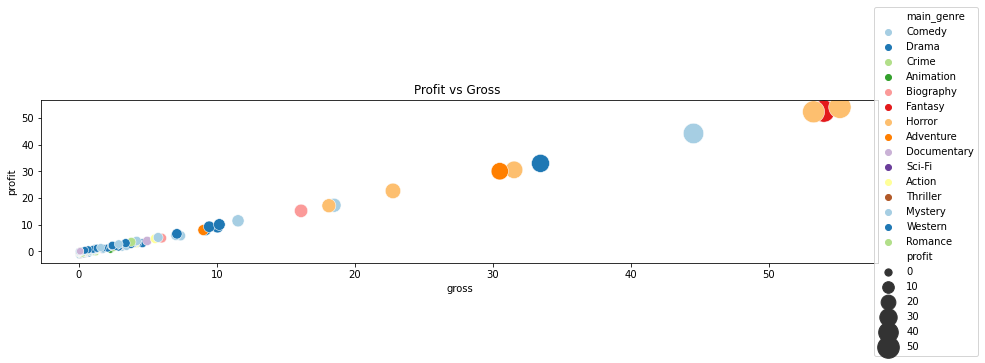

In [173]:
fig,axs = plt.subplots(figsize=(15,3))
sns.scatterplot(data=df[(df.title_year >=2000) & (df.profit < 80) &((df.budget <=1.5) & (df.budget>0)) & (df.profit>-60) & (df.gross <145) & (df.gross>0)], x="gross",hue="main_genre" ,y="profit",palette="Paired",size="profit",sizes=(40, 500)) 
axs.set_title("Profit vs Gross ")
sns.color_palette("hls", 8)
plt.legend(loc='right', borderaxespad=-10)
plt.show()        

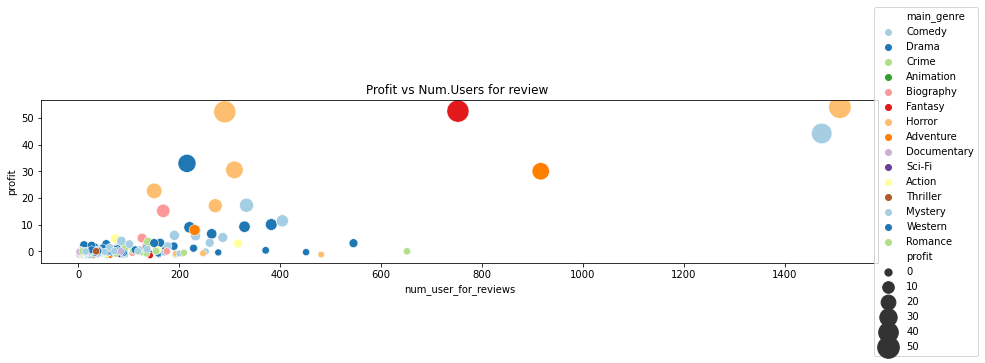

In [174]:
fig,axs = plt.subplots(figsize=(15,3))
sns.scatterplot(data=df[(df.title_year >=2000) & (df.profit < 80) & (df.profit>-60)& ((df.budget <=1.5) & (df.budget>0))& ((df.gross <145) & (df.gross>0)) ], x="num_user_for_reviews", y="profit",hue="main_genre",s=100,palette="Paired",size="profit",sizes=(40, 500)) 
axs.set_title("Profit vs Num.Users for review ")
plt.legend(loc='right', borderaxespad=-10)
plt.show()

In the first graph, we clearly observe that the color corresponding to the Horror genre (light orange) is repeated several times with high profit values.
This can also be seen in the last two graphs.

### Budget analysis in main movie genre.

Below we plot boxplots by movie genre to better understand how the budget behaves.

<AxesSubplot:xlabel='main_genre', ylabel='budget'>

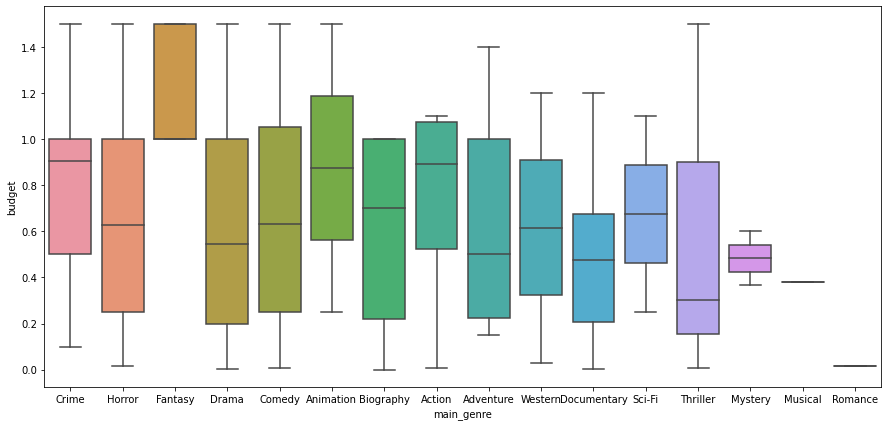

In [175]:
fig,axs = plt.subplots(figsize=(15,7))
sns.boxplot(x="main_genre", y="budget", data=df_filtered,showfliers=False)
#sns.boxplot(x="secondary_genre", y="budget", data=df_filtered,showfliers=False,ax=axs[1])

We observed median values in the range of 0.5 and 1M except for Thriller wich median is 0.3M. Horror, drama, comedy, animation, western and Sci-Fi seem to have data with a more symmetrical distribution than the rest.

### Profit analysis in main movie genre.

Now we plot boxplots by movie genre to better understand how the Profit behaves.

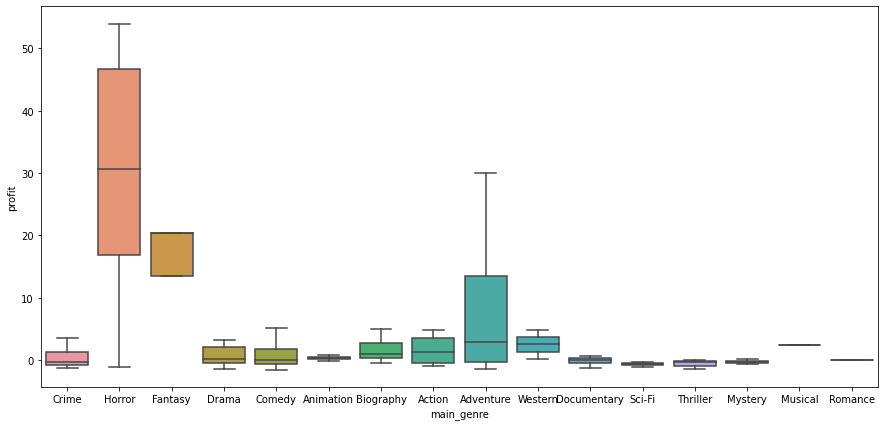

In [176]:
fig,axs = plt.subplots(figsize=(15,7))
sns.boxplot(x="main_genre", y="profit", data=df_filtered,showfliers=False)
#sns.boxplot(x="secondary_genre", y="profit", data=df_filtered,showfliers=False,ax=axs[1])
plt.show()

The boxplot belonging to the main category Horror shows a symmetrical dispersion between quartile 1 and quartile 3, with a median of 30 million, quartile 1 of 20 million, quartile 3 of 45 million and a maximum of 50 million, so, 75% of the data between quartile 1 and the maximum is between 20 million and 50 million profit.We conclude then that most of the data in the Horror movie genre have a positive profit greater than 16M wich can be observed better in the histogram and talbe below.

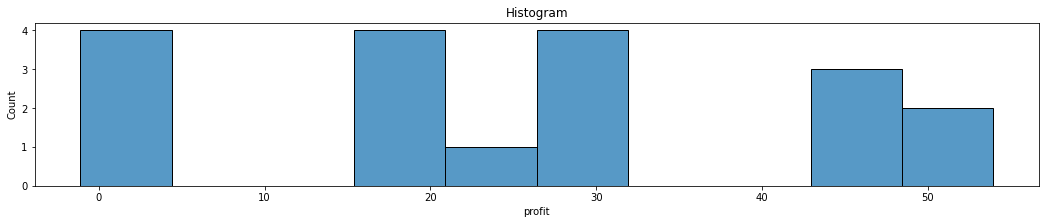

In [177]:
fig,axs = plt.subplots( figsize=(18,3))
sns.histplot(data=df_filtered[(df_filtered.main_genre=="Horror") & (df_filtered.profit<60)   ], x="profit",bins=10)
axs.set_title('Histogram')
plt.show()

In [178]:
df_filtered[(df_filtered.main_genre=="Horror")]['profit'].describe()

count     20.000000
mean      35.309371
std       35.622849
min       -1.126033
25%       16.864500
50%       30.656394
75%       46.700000
max      140.470114
Name: profit, dtype: float64

# Hypothesis and Test

#### Alternative Hypothesis

If Horror film is in the same average budgets range than other genres (0.5M-1M), then the average profit will be greater for horror films than for others genres films.

#### Null Hypothesis

Horror films have the same profit than others film genres.

We first created a summary table with the mean, standard deviation and count grouped by genre.

In [179]:
genre_means=df_filtered.groupby('main_genre')['profit'].mean()
genre_std=df_filtered.groupby('main_genre')['profit'].std()
genre_count=df_filtered.groupby('main_genre')['profit'].count()

In [180]:
general_mean=genre_means.mean()
general_std=genre_std.mean()
general_count=genre_count.mean()  

In [182]:
combinederror=(((genre_std['Horror']**2)/genre_count['Horror'])+((general_std**2)/general_count))**0.5   
z=(genre_means['Horror']-general_mean)/combinederror

print(genre_means['Horror'])
print(general_mean)

p_value_from_normal_for_diff = (1-stats.norm.cdf(z))
print ('one_tail Horror-adventure difference: ', p_value_from_normal_for_diff)

35.309371299999995
5.315858721407991
one_tail Horror-adventure difference:  0.00013298484444779213


p-value is less than 0.05 therefore we will reject the null hypothesis and we accept the alternative hypothesis

# Summary

We started by performing a general analysis of the data which led us to the conclusion that it is not possible to use all the data for our analysis, since the high profit losses after the 2000's distort the data and generate a negative correlation between profit and budget, so we performed our analysis by filtering the data with the proposed budget of 1.5M. This narrowed down the problem and we found that the budget is more evenly distributed than the profit, which is skewed to the right, so we had to further narrow down the problem and focus only on some movie genres.
For this we made scatter plots categorizing by movie genre, which showed us that the movie genre with the highest profit in the range of 1.5M or less is "Horror". We then created boxplots by genre that confirmed this information. We made our hypothesis based on these observations and found that the p-value is greater than 0.05, therefore, our hypothesis is confirmed.

Therefore, it is recommended to the SussexBudgetProductions company that next year's movie be made in the horror genre since it is more feasible to obtain high profits than in other movie genres due to the fact that in other genres it is necessary to incur in more expenses such as famous actors or special effects to achieve success that end up increasing the budget and decreasing the profits. 